# ***Installing Required Libraries***

In [67]:
#!pip install diffusers transformers accelerate

# ***Importing Libraries***

In [68]:
from diffusers import StableDiffusionPipeline  #To load our pipline
import matplotlib.pyplot as plt

import torch

# ***Showing PyTorch Info***

In [69]:
!pip show torch

Name: torch
Version: 2.6.0+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


# ***Loading the Model***

In [70]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "dreamlike-art/dreamlike-diffusion-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": null,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

# ***First Prompt (Image Description)***

In [71]:
prompt_1 = """dreamlikeart, agrungy woman with rainbow hair, traveling between dimensions, dynamic pose, happy, soft, extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans"""

# ***Generate and Display First Image***

In [72]:
image = pipe(prompt_1).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

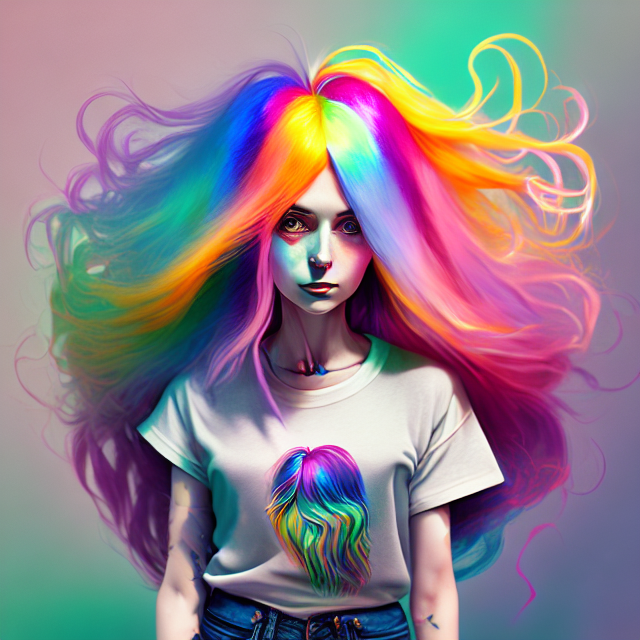

In [73]:
image

# ***Another Prompt and Image***

In [74]:
prompt_2 = "A girl is drinking a cup of coffee in the moring in the street and she wear a hand watch and formal wear"

# ***Show Second Image***

In [75]:
image2 = pipe(prompt_2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

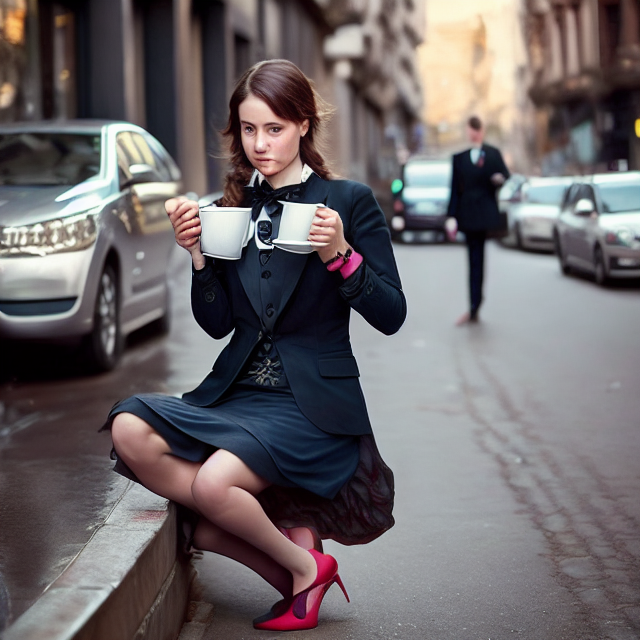

In [76]:
image2

[PROMPT]:  A girl is drinking a cup of coffee in the moring in the street and she wear a hand watch and formal wear


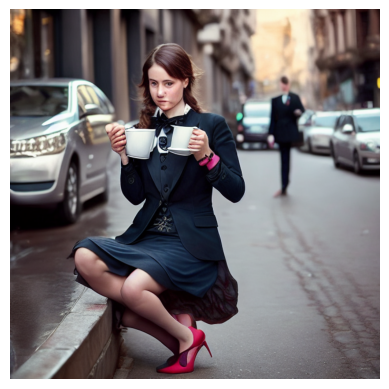

In [77]:
print("[PROMPT]: ", prompt_2)
plt.imshow(image2)
plt.axis("off")
plt.show()

# ***Working with Stable Diffusion Parameters***

*   Negative Prompting
*   num_inferences_steps
*   height
*   weight
*   num_images_per_prompt










In [78]:
def generate_images(pipe, prompt, params):
  img = pipe(prompt, **params).images
  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images, figsize=(20,20))
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis("off")
      plt.show()
  else:
    plt.imshow(img[0])
    plt.axis("off")
    plt.show()
  plt.tight_layout()

# ***Generate an Image of Children Playing***

In [79]:
prompt_3 = "A boy has 6 years and play in the house with his 5 friends, they were red color t-shirts and blue trousers, they have blue eyes and green hair"
params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

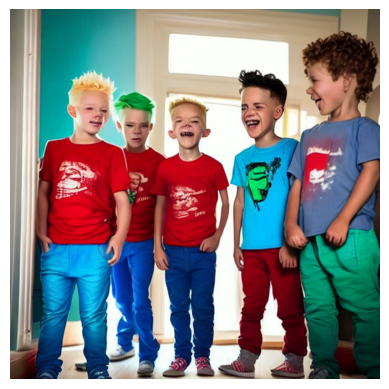

<Figure size 640x480 with 0 Axes>

In [80]:
generate_images(pipe, prompt_3, params)

# **Using More Parameters**

  0%|          | 0/50 [00:00<?, ?it/s]

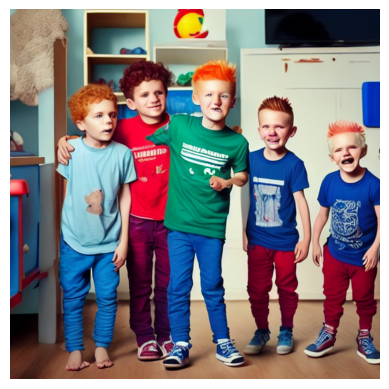

<Figure size 640x480 with 0 Axes>

In [81]:
params = {"num_inferences_steps": 100}
generate_images(pipe, prompt_3, params)

  0%|          | 0/50 [00:00<?, ?it/s]

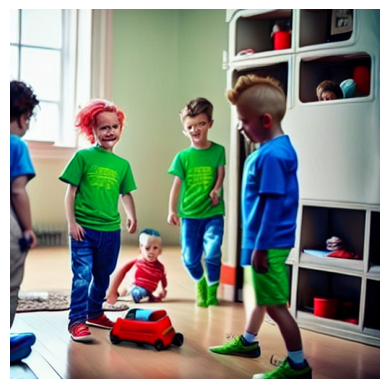

<Figure size 640x480 with 0 Axes>

In [82]:
#height   weight
params = {"num_inferences_steps": 100,"height": 512, "width": 512}
generate_images(pipe, prompt_3, params)


# ***Final Prompt About a Farmer***

In [83]:
prompt_4 = "A farmer is working in the farm and he grows tomatoes"

  0%|          | 0/50 [00:00<?, ?it/s]

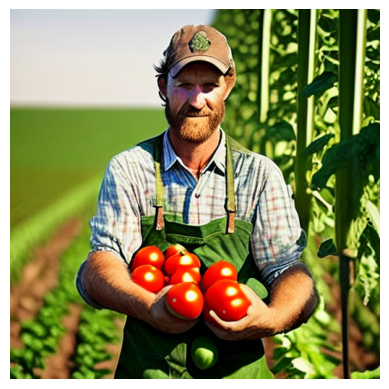

<Figure size 640x480 with 0 Axes>

In [84]:
#Negative Prompting
params = {"num_inferences_steps": 100,"num_images_per_prompt": 1, "height": 512, "width": 512,"Negative Prompting": "ugly, distorted, low quality"}
generate_images(pipe, prompt_4, params)